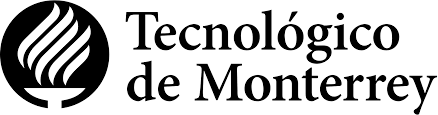

# Actividad Semanal 6 Visualización

## Ciencia y Analítica de datos
## _Maestría en Inteligencia Artificial Aplicada (MNA-V)_
#### _Victor Hugo Avila Felipe - A01794425_

## Enlace a github para subir las tareas.
https://github.com/PosgradoMNA/actividades-de-aprendizaje-flynnGodslayer

## 1. Descarga los datos y carga el dataset en tu libreta.

### Información del dataset:

**Nombre dataset:** case of customers’ default payments in Taiwan.

**Descripción de datos:** Pagos por default de clientes en Taiwan. Compara la precisión de la predicción entre seis metodos de minería de datos. Se desea obtener los clientes creíbles y no creíbles para gestionar el riego de asignación de créditos. La probabilidad real de incumplimiento es dada por Y, y la variable independiente es X. El resultado de la regresión lineal simple (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal artificial tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercana a cero y el coeficiente de regresión (B) a uno. Por lo tanto, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar con precisión la probabilidad real de incumplimiento.

**Obtenido de:** Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

A continuación se van a importar las librerías a utilizar y el dataset:

In [4]:
import pandas as pd
import numpy as np

# Cargamos el dataframe desde la liga proporcionada
mypath = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(mypath, index_col=0)
df.index.name = None

## 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

**head()**

In [5]:
# Revisamos que se cargó correctamenta el dataframe y visualizamos los primeros 5 registros

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**shape()**

In [6]:
# Revisamos las dimensiones del dataframe (Registros x Columnas)
df.shape

(30000, 24)

**columns()**

In [7]:
# Revisamos un listado del nombre de las columnas asignada al datadframe

df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

**dtypes()**

In [8]:
# Se aplica un listado de los tipos de datos que se asignaron de manera automática en la lectura de los datos

df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

**info()**

In [9]:
# Se imprime un sumario de la información general del dataframe

df.info

<bound method DataFrame.info of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19  

**isna()**

In [10]:
# Función que define si existe un valor nulo (NA) 
# dentro de los registros del dataframe.

df.isna

<bound method DataFrame.isna of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19  

In [11]:
# Para tener una mejor visualización de los datos NA, obtenemos
# una flag de si existen en el dataframe.

df.isna().values.any()

True

In [12]:
# Tambien revisamos que columnas contienen valores NA

df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [13]:
# Verificamos la totalidad de registros que contienen en por lo menos uno de 
# sus registros con NA
df[df.isna().any(axis=1)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
19,360000,2.0,1.0,1.0,49.0,1.0,-2.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,50000,1.0,1.0,2.0,25.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,NaN,780.0,0.0,0.0,0.0,0.0,0.0,1.0
50,20000,1.0,1.0,2.0,24.0,0.0,0.0,0.0,0.0,NaN,...,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0.0
65,130000,2.0,2.0,1.0,51.0,-1.0,-1.0,-2.0,-2.0,-1.0,...,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0,0.0
161,30000,1.0,1.0,2.0,41.0,2.0,2.0,2.0,NaN,2.0,...,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0,0.0
174,50000,2.0,1.0,2.0,24.0,1.0,-2.0,-2.0,-2.0,-2.0,...,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0
176,130000,1.0,3.0,1.0,56.0,1.0,2.0,2.0,2.0,2.0,...,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0,1.0
183,500000,2.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0,0.0
220,310000,2.0,1.0,2.0,NaN,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0,0.0
234,190000,1.0,2.0,2.0,34.0,2.0,0.0,0.0,0.0,NaN,...,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0,1.0


## 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

**Eliminación registros NA**

In [14]:
# Eliminamos los valores NA del dataframe, creando una copia primero para
# aplicar la solución 2
df_not_na = df.copy()
df_not_na.dropna(inplace = True)

# Verificamos que no existan valores NA en el dataframe copia.
# Se eliminaron 42 filas de 30,000; lo cual equivale a un 0.14% del dataframe
# original
df_not_na.isnull().values.any()

False

**Sustitución por Media**

In [15]:
# Se aplica una función para sustituir la Media
df_sust_med = df.copy()
for column in df_sust_med.columns:
    avg = df_sust_med[column].mean()
    df_sust_med[column].fillna(value = avg, inplace = True)
    
# Y verificamos que la operación fue exitosa.

df_sust_med.isna().values.any()

False

## 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [16]:
# Nos quedamos con la primera solución con pérdida de pocos datos. 
df_not_na.describe

<bound method NDFrame.describe of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19

In [17]:
# Ahora, comenzamos a definir los usos del describe(). Inicialmente
# aplicaremos la descripción de todos los datos.
df_not_na.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Las medidas de tendencia central son:

**Conteo:** Muestra el número total de registros contados.

**Media:** Es el promedio de los valores.

**STD (Desviación estandar:** Es la dispersión de los datos. 

**Mínimo:** Muestra el valor mínimo de la serie de datos.

**25%, 50%, 75%:** Los valores que wobrepasan el % definido de la distribución.

**Máximo:** Valor máximo de la distribución.


## 5. Realiza el conteo de las variables categóricas

Para realizar esta distinción, debemos revisar la descripción de las variables. A continuación se describen los datos:

- **X1**: credit given.
- **X2**: Gender (1 = male; 2 = female).
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- **X4**: Marital status (1 = married; 2 = single; 3 = others).
- **X5**: Age (year).
- **X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    X6 = the repayment status in September, 2005; 
    X7 = the repayment status in August, 2005; . . .;
    X11 = the repayment status in April, 2005. 
    The measurement scale for the repayment status is:
        -1 = pay duly; 
        1 = payment delay for one month; 
        2 = payment delay for two months; . . .; 
        8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). 
    X12 = amount of bill statement in September, 2005; 
    X13 = amount of bill statement in August, 2005; . . .; 
    X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). 
    X18 = amount paid in September, 2005; 
    X19 = amount paid in August, 2005; . . .;
    X23 = amount paid in April, 2005. 

Se identifican los siguientes nombres de columnas que serán sustituidos en el dataframe para su mejor visualización.

In [18]:
# Definimos los nombres de las columnas de acuerdo a la documentación 
# proprocionada junto con el dataframe.
df_not_na.columns
df_not_na.rename(columns = {'X1' : 'credit_giv', 
                           'X2' : 'gender', 
                           'X3' : 'education', 
                           'X4' : 'marital', 
                           'X5' : 'age', 
                           'X6' : 'repay_stat_sep', 
                           'X7' : 'repay_stat_aug', 
                           'X8' : 'repay_stat_jul', 
                           'X9' : 'repay_stat_jun', 
                           'X10' : 'repay_stat_may', 
                           'X11' : 'repay_stat_apr', 
                           'X12' : 'bill_stmnt_dll_sep', 
                           'X13' : 'bill_stmnt_dll_aug', 
                           'X14' : 'bill_stmnt_dll_jul', 
                           'X15' : 'bill_stmnt_dll_jun', 
                           'X16' : 'bill_stmnt_dll_may', 
                           'X17' : 'bill_stmnt_dll_apr', 
                           'X18' : 'prev_pay_sep', 
                           'X19' : 'prev_pay_aug', 
                           'X20' : 'prev_pay_jul', 
                           'X21' : 'prev_pay_jun', 
                           'X22' : 'prev_pay_may', 
                           'X23' : 'prev_pay_apr',
                            'Y' : 'default_pay'}, inplace = True)

# Renombramos el dataframe en una nueva copia y ordenamos los datos para una
# lectura mas sencilla

df_names = df_not_na[['credit_giv', 
                           'gender', 
                           'education', 
                           'marital', 
                           'age', 
                           'repay_stat_apr', 
                           'repay_stat_may', 
                           'repay_stat_jun', 
                           'repay_stat_jul', 
                           'repay_stat_aug', 
                           'repay_stat_sep', 
                           'bill_stmnt_dll_apr', 
                           'bill_stmnt_dll_may', 
                           'bill_stmnt_dll_jun', 
                           'bill_stmnt_dll_jul', 
                           'bill_stmnt_dll_aug', 
                           'bill_stmnt_dll_sep', 
                           'prev_pay_apr', 
                           'prev_pay_may', 
                           'prev_pay_jun',
                           'prev_pay_jul',  
                           'prev_pay_aug',
                           'prev_pay_sep',
                           'default_pay'
                           ]]
df_names

,credit_giv,gender,education,marital,age,repay_stat_apr,repay_stat_may,repay_stat_jun,repay_stat_jul,repay_stat_aug,...,bill_stmnt_dll_jul,bill_stmnt_dll_aug,bill_stmnt_dll_sep,prev_pay_apr,prev_pay_may,prev_pay_jun,prev_pay_jul,prev_pay_aug,prev_pay_sep,default_pay
1,20000,2.0,2.0,1.0,24.0,-2.0,-2.0,-1.0,-1.0,2.0,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,2.0,0.0,0.0,0.0,2.0,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0.0
5,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,-1.0,0.0,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,192815.0,188948.0,1000.0,5000.0,3047.0,5003.0,20000.0,8500.0,0.0
29997,150000,1.0,3.0,2.0,43.0,0.0,0.0,-1.0,-1.0,-1.0,...,3502.0,1828.0,1683.0,0.0,0.0,129.0,8998.0,3526.0,1837.0,0.0
29998,30000,1.0,2.0,2.0,37.0,0.0,0.0,-1.0,2.0,3.0,...,2758.0,3356.0,3565.0,3100.0,2000.0,4200.0,22000.0,0.0,0.0,1.0
29999,80000,1.0,3.0,1.0,41.0,-1.0,0.0,0.0,0.0,-1.0,...,76304.0,78379.0,-1645.0,1804.0,52964.0,1926.0,1178.0,3409.0,85900.0,1.0


Como variables categóricas, se identifican las siguientes:

- gender
- education
- marital
- age
- repay_stat_apr
- repay_stat_may
- repay_stat_jun
- repay_stat_jul
- repay_stat_aug
- repay_stat_sep

Ya que para su correcta interpretación, se requiere de sustituír los valores numéricos con sus mapeos en sus catálogos respectivos. por ejemplo, el 1 y 2 para hombre y mujer respectivamente en gender. Estos valores indican categoría, mas no monto, como lo es en el caso de las variables eliminadas de este listado.

In [19]:
# Se aplica la visualización de los valores categóricos
df_names[['gender', 'education', 'marital', 'age', 'repay_stat_apr', 
         'repay_stat_may', 'repay_stat_jun', 'repay_stat_jul', 
         'repay_stat_aug', 'repay_stat_sep']]

,gender,education,marital,age,repay_stat_apr,repay_stat_may,repay_stat_jun,repay_stat_jul,repay_stat_aug,repay_stat_sep
1,2.0,2.0,1.0,24.0,-2.0,-2.0,-1.0,-1.0,2.0,2.0
2,2.0,2.0,2.0,26.0,2.0,0.0,0.0,0.0,2.0,-1.0
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,57.0,0.0,0.0,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
29996,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1.0,3.0,2.0,43.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
29998,1.0,2.0,2.0,37.0,0.0,0.0,-1.0,2.0,3.0,4.0
29999,1.0,3.0,1.0,41.0,-1.0,0.0,0.0,0.0,-1.0,1.0


## 6. Escala los datos, si consideras necesario

La escala de datos se usa cuando los datos de entrada se van a aplicar a un modelo. Para esto, solo vamos a aplicar el escalado a las variables no categóricas.

In [21]:
# Tomamos las librerías que usaremos
from sklearn.preprocessing import StandardScaler

# Estandarizamos los valores con un escalador
df_scaled = StandardScaler().fit_transform(df_names)

# Regresamos a un dataframe
df_scaled = pd.DataFrame(df_scaled) 

df_scaled

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.137363,0.809689,0.185849,-1.057086,-1.246282,-1.486513,-1.530700,-0.666630,-0.696680,1.782583,...,-0.667925,-0.647359,-0.642497,-0.293485,-0.314124,-0.308107,-0.296782,-0.227134,-0.341890,1.876689
1,-0.366561,0.809689,0.185849,0.858831,-1.029224,1.993916,0.235635,0.189241,0.139436,1.782583,...,-0.639201,-0.666697,-0.659205,-0.181054,-0.314124,-0.244315,-0.240019,-0.213645,-0.341890,1.876689
2,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.253701,0.235635,0.189241,0.139436,0.111950,...,-0.482436,-0.493940,-0.298738,-0.012407,-0.248702,-0.244315,-0.240019,-0.191958,-0.250270,-0.532853
3,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.253701,0.235635,0.189241,0.139436,0.111950,...,0.032552,-0.013586,-0.057797,-0.237269,-0.244188,-0.237936,-0.228667,-0.169448,-0.221179,-0.532853
4,-0.906122,-1.235043,0.185849,-1.057086,2.335161,0.253701,0.235635,0.189241,-0.696680,0.111950,...,-0.161383,-0.611297,-0.578648,-0.255314,-0.269048,0.266021,0.270850,1.333962,-0.221179,-0.532853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.404240,-1.235043,1.450938,-1.057086,0.381647,0.253701,0.235635,0.189241,0.139436,0.111950,...,2.325211,2.016773,1.869050,-0.237269,0.012988,-0.113733,-0.012796,0.610450,0.171131,-0.532853
29954,-0.135321,-1.235043,1.450938,0.858831,0.815761,0.253701,0.235635,-0.666630,-0.696680,-0.723367,...,-0.627383,-0.665250,-0.672765,-0.293485,-0.314124,-0.299878,0.213973,-0.104084,-0.231017,-0.532853
29955,-1.060283,-1.235043,0.185849,0.858831,0.164590,0.253701,0.235635,-0.666630,1.811669,2.617900,...,-0.638106,-0.643793,-0.647220,-0.119217,-0.183279,-0.040181,0.952008,-0.257018,-0.341890,1.876689
29956,-0.674882,-1.235043,1.450938,-1.057086,0.598704,-0.616406,0.235635,0.189241,0.139436,-0.723367,...,0.421878,0.409753,-0.717937,-0.192072,3.150905,-0.185244,-0.229915,-0.109159,4.842633,1.876689


## 7. Reduce las dimensiones con PCA, si consideras necesario

In [38]:
# Tomamos las librerías que usemos
from sklearn.decomposition import PCA

# Se aplican 10 componentes a la función de PCA
pca_eval = PCA(n_components = 10) 
componentes_principales = pca_eval.fit_transform(df_scaled)

print('PCA: ', componentes_principales.shape)
print('PCA explained variance ratio: ', pca_eval.explained_variance_ratio_)
print('PCA singular values : ', pca_eval.singular_values_)

PCA:  (29958, 10)
PCA explained variance ratio:  [0.27301007 0.17504995 0.06470639 0.06144887 0.04336966 0.04058541
 0.0381546  0.03780229 0.03693108 0.03630422]
PCA singular values :  [443.04859217 354.7668489  215.69278946 210.19335175 176.58550786
 170.82326144 165.62866101 164.862194   162.95136692 161.56250512]


Se busca encontrtar la variabilidad de los datos atraves de los componentes principales.
Se busca reducir dimensiones y hacer una transformación a los componentes principales (PC).  

### 7.1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

### 7.2 Indica la importancia de las variables en cada componente

### 8. Elabora los histogramas de los atributos para visualizar su distribución

### 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

### 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


**Bibliografía:**

Shanthababu, P. (2021). Effective Data Visualization Techniques in Data Science Using Python. Analytics Vidhya. Recuperado de: https://www.analyticsvidhya.com/blog/2021/08/effective-data-visualization-techniques-in-data-science-using-python/Enlaces a un sitio externo.

Rajbangshi, A. (2020). Importance of Data Storytelling in Data Science. Artificial Intelligence in Plain English. Recuperado de: https://ai.plainenglish.io/importance-of-data-storytelling-in-data-science-494f49273027Enlaces a un sitio externo.

Das, A. (2020). Data Visualization in Data Science. Towards Data Science. Recuperado de: https://towardsdatascience.com/data-visualization-in-data-science-5681cbdde5bf